**Introduction**

This notebook is about an analysis on the impact of coronavirus on market capitalization of the SP500 index companies.

**Import libraries**

In [108]:
# load data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import data**

There are 5 datasets: 

1. List of SP500 companies

  Description of SP500 companies

2. Q1-Q4_2019: 

  Stock price data of SP500 companies for all quarters of 2019

3. Q1-Q4_2020

  Stock price data of SP500 companies for all quarters of 2020

4. Q1-Q4_2021

  Stock price data of SP500 companies for all quarters of 2021

5. Shares companies

  Units of equity ownership in a corporation.

**EDA**

From Wikepedia we import data set 1 "List of SP500 companies".

**Dataset #1 - List of SP500 companies**

In [109]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
stocks_df = pd.read_html(url, header=0)[0]
stocks_df.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [110]:
stocks_df.to_csv('/content/drive/MyDrive/DAB103-DEMO/Project/stocks_df.csv')

To understand Dataset #1 we will provide a brief description of the name of the columns

**Symbol:** Nmemonic which represents the name of the company.

**Security:** Fungible and tradable financial instruments used to raise capital in public and private markets.

**SEC filings:** Important regulatory documents required of all public companies to provide key information to investors or potential investors. 

**GICS Sector:**  Company sector according to Global Industry Classification Standard.
 
**GICS Sub-Industry:** Company sub-industry according to Global Industry Classification Standard.

**Headquarters:** City and state where company headquarter is located.
 
**Date first added:** Date in which the company entered in the SP500 index.
  
**CIK:** Central Index Key is a number given to an individual, company, or foreign government by the United States Securities and Exchange Commission. 
  
**Founded:** Year in which the company was founded.

Source: 1 https://www.investopedia.com 2 https://en.wikipedia.org/wiki/Central_Index_Key


Next step is to check the size of the data set.

In [111]:
stocks_df.shape

(503, 9)

We noticed that there are more that 500 Symbols for the SP500 index. Let's print out all unique values on the Symbol column.

In [112]:
print(stocks_df["Symbol"].unique())

['MMM' 'AOS' 'ABT' 'ABBV' 'ABMD' 'ACN' 'ATVI' 'ADM' 'ADBE' 'ADP' 'AAP'
 'AES' 'AFL' 'A' 'APD' 'AKAM' 'ALK' 'ALB' 'ARE' 'ALGN' 'ALLE' 'LNT' 'ALL'
 'GOOGL' 'GOOG' 'MO' 'AMZN' 'AMCR' 'AMD' 'AEE' 'AAL' 'AEP' 'AXP' 'AIG'
 'AMT' 'AWK' 'AMP' 'ABC' 'AME' 'AMGN' 'APH' 'ADI' 'ANSS' 'AON' 'APA'
 'AAPL' 'AMAT' 'APTV' 'ACGL' 'ANET' 'AJG' 'AIZ' 'T' 'ATO' 'ADSK' 'AZO'
 'AVB' 'AVY' 'BKR' 'BALL' 'BAC' 'BBWI' 'BAX' 'BDX' 'WRB' 'BRK.B' 'BBY'
 'BIO' 'TECH' 'BIIB' 'BLK' 'BK' 'BA' 'BKNG' 'BWA' 'BXP' 'BSX' 'BMY' 'AVGO'
 'BR' 'BRO' 'BF.B' 'CHRW' 'CDNS' 'CZR' 'CPT' 'CPB' 'COF' 'CAH' 'KMX' 'CCL'
 'CARR' 'CTLT' 'CAT' 'CBOE' 'CBRE' 'CDW' 'CE' 'CNC' 'CNP' 'CDAY' 'CF'
 'CRL' 'SCHW' 'CHTR' 'CVX' 'CMG' 'CB' 'CHD' 'CI' 'CINF' 'CTAS' 'CSCO' 'C'
 'CFG' 'CLX' 'CME' 'CMS' 'KO' 'CTSH' 'CL' 'CMCSA' 'CMA' 'CAG' 'COP' 'ED'
 'STZ' 'CEG' 'COO' 'CPRT' 'GLW' 'CTVA' 'CSGP' 'COST' 'CTRA' 'CCI' 'CSX'
 'CMI' 'CVS' 'DHI' 'DHR' 'DRI' 'DVA' 'DE' 'DAL' 'XRAY' 'DVN' 'DXCM' 'FANG'
 'DLR' 'DFS' 'DISH' 'DIS' 'DG' 'DLTR' 'D' 'DPZ' 'DOV' 'DOW'

In [113]:
stocks_df.set_index('Symbol', inplace = True)
stocks_df.columns

Index(['Security', 'SEC filings', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded'],
      dtype='object')

In [114]:
#let's find null values on our dataset
stocks_df.isnull().sum()

Security                  0
SEC filings               0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date first added         45
CIK                       0
Founded                   0
dtype: int64

Now we see the classification of the companies by sector

In [115]:
stocks_df['GICS Sector'].value_counts()

Information Technology    75
Industrials               71
Financials                67
Health Care               64
Consumer Discretionary    56
Consumer Staples          33
Real Estate               31
Utilities                 30
Materials                 28
Communication Services    25
Energy                    23
Name: GICS Sector, dtype: int64

In [116]:
a =pd.DataFrame(stocks_df['GICS Sector'].value_counts())

Text(0.5, 1.0, 'Total of SP500 companies by Group')

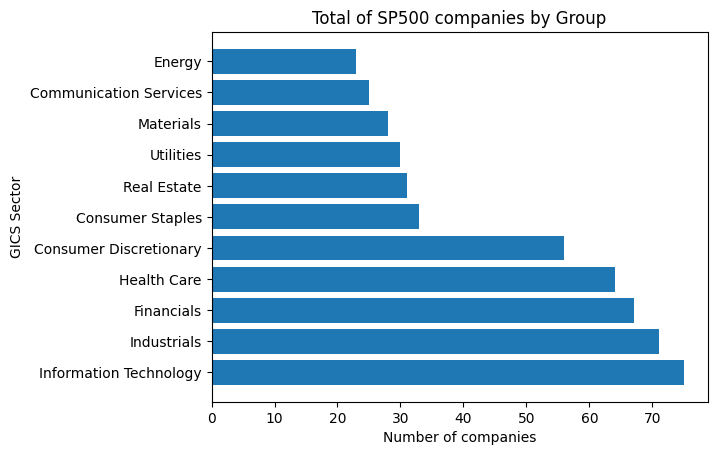

In [117]:
plt.rcdefaults()
fig, ax = plt.subplots()

count_companies = list(stocks_df['GICS Sector'].value_counts())
sector_companies = ["Information Technology","Industrials","Financials","Health Care","Consumer Discretionary","Consumer Staples","Real Estate","Utilities","Materials","Communication Services","Energy" ]

ax.barh(sector_companies, count_companies, align='center')
ax.set_xlabel('Number of companies')
ax.set_ylabel('GICS Sector')
ax.set_title('Total of SP500 companies by Group')



In [118]:
stocks_df['GICS Sub-Industry'].value_counts()[0:10]

Health Care Equipment                    19
Semiconductors                           14
Industrial Machinery                     14
Electric Utilities                       13
Multi-Utilities                          13
Application Software                     13
Regional Banks                           12
Packaged Foods & Meats                   12
Data Processing & Outsourced Services    11
Oil & Gas Exploration & Production       10
Name: GICS Sub-Industry, dtype: int64

In [119]:
stocks_df['GICS Sub-Industry'].nunique()

122

**Dataset #2 - Q1-Q4_2019**

This data is was extracted using Yahoo finance API. The file can be downloaded from this [link](https://github.com/DAB103-001/EDA/blob/main/Q1-Q4_2019.xlsx?raw=true) 

In [120]:
quarters_2019 = pd.read_excel('https://github.com/DAB103-001/EDA/blob/main/Q1-Q4_2019.xlsx?raw=true')

In [121]:
quarters_2019.set_index('ticker', inplace=True)

Now we calculate the average price of each company stock per year

In [122]:
quarters_2019 = quarters_2019.rename(columns={'Q1': 'Q1_2019','Q2': 'Q2_2019','Q3': 'Q3_2019','Q4': 'Q4_2019'})


In [123]:
quarters_2019["Avg_2019"]= (quarters_2019["Q1_2019"]+ quarters_2019["Q2_2019"]+ quarters_2019["Q3_2019"] +quarters_2019["Q4_2019"])/4

quarters_2019

In [124]:
quarters_2019

,level,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Avg_2019
ticker,,,,,,
BALL,Close,57.860001,69.989998,72.809998,64.669998,66.332499
PCG,Close,17.799999,22.920000,10.000000,10.870000,15.397500
PSA,Close,217.779999,238.169998,245.270004,212.960007,228.545002
FLT,Close,246.589996,280.850006,286.779999,287.720001,275.485001
MRNA,Close,20.350000,14.640000,15.920000,19.559999,17.617500
...,...,...,...,...,...,...
YUM,Close,99.809998,110.669998,113.430000,100.730003,106.160000
CRM,Close,158.369995,151.729996,148.440002,162.639999,155.294998
FDX,Close,181.410004,164.190002,145.570007,151.210007,160.595005


To understand the dataDataset #2 we will provide a brief description of the name of the columns

**ticker:** Nmemonic which represents the name of the company

**level:** Refers to the attribute of the stock at the end of the trading day.

**Q1_2019:** Represents the mean of the value of a particular stock during the months of january through mars. 

**Q2_2019:** Represents the mean of the value of a particular stock during the months of april through june.

**Q3_2019:** Represents the mean of the value of a particular stock during the months of july through september. 
 
**Q4_2019:** Represents the mean of the value of a particular stock during the months of october through december. 

Source: https://github.com/DAB103-001/EDA/blob/main/Q1-Q4_2019.xlsx

In [125]:
quarters_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, BALL to HIG
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   level     503 non-null    object 
 1   Q1_2019   493 non-null    float64
 2   Q2_2019   493 non-null    float64
 3   Q3_2019   493 non-null    float64
 4   Q4_2019   493 non-null    float64
 5   Avg_2019  493 non-null    float64
dtypes: float64(5), object(1)
memory usage: 27.5+ KB


In [126]:
quarters_2019.describe()

,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Avg_2019
count,493.000000,493.000000,493.000000,493.000000,493.000000
mean,114.974173,121.877907,123.575606,132.289694,123.179345
std,170.305545,196.030160,209.370052,218.006267,197.990069
min,8.780000,10.230000,9.160000,9.300000,9.367500
25%,47.709999,48.459999,49.900002,53.779999,50.842501
50%,80.379997,83.949997,86.139999,90.470001,85.227501
75%,134.894836,141.899994,145.570007,151.479996,143.080002
max,2767.000000,3370.250000,3717.350098,3808.409912,3415.752502


In [127]:
quarters_2019.isna().sum()

level        0
Q1_2019     10
Q2_2019     10
Q3_2019     10
Q4_2019     10
Avg_2019    10
dtype: int64

Data cleaning for Dataset #2

In [128]:
quarters_2019.dropna(inplace=True)

In [129]:
quarters_2019.isna().sum()

level       0
Q1_2019     0
Q2_2019     0
Q3_2019     0
Q4_2019     0
Avg_2019    0
dtype: int64

In [130]:
quarters_2019

,level,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Avg_2019
ticker,,,,,,
BALL,Close,57.860001,69.989998,72.809998,64.669998,66.332499
PCG,Close,17.799999,22.920000,10.000000,10.870000,15.397500
PSA,Close,217.779999,238.169998,245.270004,212.960007,228.545002
FLT,Close,246.589996,280.850006,286.779999,287.720001,275.485001
MRNA,Close,20.350000,14.640000,15.920000,19.559999,17.617500
...,...,...,...,...,...,...
YUM,Close,99.809998,110.669998,113.430000,100.730003,106.160000
CRM,Close,158.369995,151.729996,148.440002,162.639999,155.294998
FDX,Close,181.410004,164.190002,145.570007,151.210007,160.595005


The same dataset transformation is applied for Dataset#3 and Dataset#4

In [131]:
quarters_2020 = pd.read_excel('https://github.com/DAB103-001/EDA/blob/main/Q1-Q4_2020.xlsx?raw=true')
quarters_2020.set_index('ticker', inplace = True)
quarters_2020 = quarters_2020.rename(columns={'Q1': 'Q1_2020','Q2': 'Q2_2020','Q3': 'Q3_2020','Q4': 'Q4_2020'})
quarters_2021 = pd.read_excel('https://github.com/DAB103-001/EDA/blob/main/Q1-Q4_2021.xlsx?raw=true')
quarters_2021.set_index('ticker', inplace = True)
quarters_2021 = quarters_2021.rename(columns={'Q1': 'Q1_2021','Q2': 'Q2_2021','Q3': 'Q3_2021','Q4': 'Q4_2021'})
quarters_2020.dropna(inplace=True)
quarters_2021.dropna(inplace=True)
quarters_2020["Avg_2020"]= (quarters_2020["Q1_2020"]+ quarters_2020["Q2_2020"]+ quarters_2020["Q3_2020"] +quarters_2020["Q4_2020"])/4
quarters_2021["Avg_2021"]= (quarters_2021["Q1_2021"]+ quarters_2021["Q2_2021"]+ quarters_2021["Q3_2021"] +quarters_2021["Q4_2021"])/4

**Dataset #2 - Q1-Q4_2019**

In [132]:
quarters_2019
quarters_2019.sort_values(by=['ticker'])


,level,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Avg_2019
ticker,,,,,,
A,Close,80.379997,74.669998,76.629997,85.309998,79.247498
AAL,Close,31.760000,32.610001,26.969999,28.680000,30.005000
AAP,Close,170.529999,154.139999,165.399994,160.160004,162.557499
AAPL,Close,47.487499,49.480000,55.992500,73.412498,56.593124
ABBV,Close,80.589996,72.720001,75.720001,88.540001,79.392500
...,...,...,...,...,...,...
YUM,Close,99.809998,110.669998,113.430000,100.730003,106.160000
ZBH,Close,123.980583,114.310677,133.271851,145.320389,129.220875
ZBRA,Close,209.529999,209.490005,206.369995,255.440002,220.207500


**Dataset #3 - Q1-Q4_2020**

In [133]:
quarters_2020
quarters_2020.sort_values(by=['ticker'])


,level,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Avg_2020
ticker,,,,,,
A,Close,71.620003,88.370003,100.940002,118.489998,94.855001
AAL,Close,12.190000,13.070000,12.290000,15.770000,13.330000
AAP,Close,93.320000,142.449997,153.500000,157.509995,136.694998
AAPL,Close,63.572498,91.199997,115.809998,132.690002,100.818124
ABBV,Close,76.190002,98.180000,87.589996,107.150002,92.277500
...,...,...,...,...,...,...
YUM,Close,68.529999,86.910004,91.300003,108.559998,88.825001
ZBH,Close,98.135925,115.883492,132.174759,149.601944,123.949030
ZBRA,Close,183.600006,255.949997,252.460007,384.329987,269.084999


**Dataset #4 - Q1-Q4_2021**

In [134]:
quarters_2021
quarters_2021.sort_values(by=['ticker'])

,level,Q1_2021,Q2_2021,Q3_2021,Q4_2021,Avg_2021
ticker,,,,,,
A,Close,127.139999,147.809998,157.529999,159.649994,148.032497
AAL,Close,23.900000,21.209999,20.520000,17.959999,20.897500
AAP,Close,183.490005,205.139999,208.889999,239.880005,209.350002
AAPL,Close,122.150002,136.960007,141.500000,177.570007,144.545004
ABBV,Close,108.220001,112.639999,107.870003,135.399994,116.032499
...,...,...,...,...,...,...
YUM,Close,108.180000,115.029999,122.309998,138.860001,121.094999
ZBH,Close,155.417480,156.135925,142.097092,123.339806,144.247576
ZBRA,Close,485.179993,529.489990,515.419983,595.200012,531.322495


**Dataset #5 - Shares companies**

In [135]:
shares_companies = pd.read_excel('https://github.com/DAB103-001/EDA/blob/main/Shares_Companies.xlsx?raw=true')
shares_companies.set_index('Symbol', inplace = True)
shares_companies.sort_values(by=['Symbol'])


,Shares
Symbol,
A,2.960410e+08
AAL,6.498460e+08
AAP,6.011820e+07
AAPL,1.607080e+10
ABBV,1.768100e+09
...,...
YUM,2.845420e+08
ZBH,2.098200e+08
ZBRA,5.178990e+07


Next we joint Dataset#2 , Dataset#3, Dataset#4 and Dataset#5

In [136]:
df = pd.concat([quarters_2019["Avg_2019"], quarters_2020["Avg_2020"], quarters_2021["Avg_2021"],shares_companies["Shares"]], axis=1, join="inner")

Now we calculate Market Capitalization for each year. This is done by multiplying the share quatity by the average stock price on each year

In [137]:
df

,Avg_2019,Avg_2020,Avg_2021,Shares
BALL,66.332499,77.612501,87.999998,3.143070e+08
PCG,15.397500,9.927500,10.905000,2.465410e+09
PSA,228.545002,211.037498,304.777500,1.755420e+08
FLT,275.485001,237.249996,252.449997,7.501330e+07
MRNA,17.617500,67.345000,251.192493,3.912000e+08
...,...,...,...,...
YUM,106.160000,88.825001,121.094999,2.845420e+08
CRM,155.294998,201.290001,245.372501,1.000000e+09
FDX,160.595005,193.155001,265.075001,2.602200e+08
SNPS,130.072500,199.252495,297.870003,1.529110e+08


In [138]:
df["MC_2019"] = df["Avg_2019"]* df["Shares"]

In [139]:
df["MC_2020"] = df["Avg_2020"]* df["Shares"]

In [140]:
df["MC_2021"] = df["Avg_2021"]* df["Shares"]

Finally we can determine the % of variation 2019-2020 and 2020-2021

In [141]:
df["MC_var_2020_2019"] = ((df["MC_2020"]/df["MC_2019"])-1)*100

In [142]:
df["MC_var_2021_2020"] = ((df["MC_2021"]/df["MC_2020"])-1)*100

In [143]:
df

,Avg_2019,Avg_2020,Avg_2021,Shares,MC_2019,MC_2020,MC_2021,MC_var_2020_2019,MC_var_2021_2020
BALL,66.332499,77.612501,87.999998,3.143070e+08,2.084877e+10,2.439415e+10,2.765902e+10,17.005243,13.383794
PCG,15.397500,9.927500,10.905000,2.465410e+09,3.796115e+10,2.447536e+10,2.688530e+10,-35.525247,9.846388
PSA,228.545002,211.037498,304.777500,1.755420e+08,4.011925e+10,3.704594e+10,5.350125e+10,-7.660418,44.418647
FLT,275.485001,237.249996,252.449997,7.501330e+07,2.066504e+10,1.779690e+10,1.893711e+10,-13.879160,6.406744
MRNA,17.617500,67.345000,251.192493,3.912000e+08,6.891966e+09,2.634536e+10,9.826650e+10,282.261956,272.993530
...,...,...,...,...,...,...,...,...,...
YUM,106.160000,88.825001,121.094999,2.845420e+08,3.020698e+10,2.527444e+10,3.445662e+10,-16.329125,36.329860
CRM,155.294998,201.290001,245.372501,1.000000e+09,1.552950e+11,2.012900e+11,2.453725e+11,29.617826,21.899995
FDX,160.595005,193.155001,265.075001,2.602200e+08,4.179003e+10,5.026279e+10,6.897782e+10,20.274600,37.234345
SNPS,130.072500,199.252495,297.870003,1.529110e+08,1.988952e+10,3.046790e+10,4.554760e+10,53.185719,49.493738


Now we add the information of each GICS Sector by company

In [144]:
df = pd.concat([df, stocks_df["GICS Sector"]], axis=1, join="inner")

In [145]:
df = df.rename(columns={'GICS Sector': 'GICS_Sector'})

In [146]:
df

,Avg_2019,Avg_2020,Avg_2021,Shares,MC_2019,MC_2020,MC_2021,MC_var_2020_2019,MC_var_2021_2020,GICS_Sector
BALL,66.332499,77.612501,87.999998,3.143070e+08,2.084877e+10,2.439415e+10,2.765902e+10,17.005243,13.383794,Materials
PCG,15.397500,9.927500,10.905000,2.465410e+09,3.796115e+10,2.447536e+10,2.688530e+10,-35.525247,9.846388,Utilities
PSA,228.545002,211.037498,304.777500,1.755420e+08,4.011925e+10,3.704594e+10,5.350125e+10,-7.660418,44.418647,Real Estate
FLT,275.485001,237.249996,252.449997,7.501330e+07,2.066504e+10,1.779690e+10,1.893711e+10,-13.879160,6.406744,Information Technology
MRNA,17.617500,67.345000,251.192493,3.912000e+08,6.891966e+09,2.634536e+10,9.826650e+10,282.261956,272.993530,Health Care
...,...,...,...,...,...,...,...,...,...,...
YUM,106.160000,88.825001,121.094999,2.845420e+08,3.020698e+10,2.527444e+10,3.445662e+10,-16.329125,36.329860,Consumer Discretionary
CRM,155.294998,201.290001,245.372501,1.000000e+09,1.552950e+11,2.012900e+11,2.453725e+11,29.617826,21.899995,Information Technology
FDX,160.595005,193.155001,265.075001,2.602200e+08,4.179003e+10,5.026279e+10,6.897782e+10,20.274600,37.234345,Industrials
SNPS,130.072500,199.252495,297.870003,1.529110e+08,1.988952e+10,3.046790e+10,4.554760e+10,53.185719,49.493738,Information Technology


In [147]:
df.to_excel("output_MC.xlsx")

In [148]:
df = pd.concat([quarters_2019["Q1_2019"],quarters_2019["Q2_2019"],quarters_2019["Q3_2019"],quarters_2019["Q4_2019"],quarters_2020["Q1_2020"],quarters_2020["Q2_2020"],quarters_2020["Q3_2020"],quarters_2020["Q4_2020"],quarters_2021["Q1_2021"],quarters_2021["Q2_2021"],quarters_2021["Q3_2021"],quarters_2021["Q4_2021"],shares_companies["Shares"],df["GICS_Sector"]], axis=1, join="inner")

To provide an overview by quarters we now concatenate the data.

In [149]:
df.rename({0: "Q1_2019", 1: "Q2_2019", 2: "Q3_2019", 3: "Q4_2019",4: "Q1_2020", 5: "Q2_2020", 6: "Q3_2020", 7: "Q4_2020",8: "Q1_2021", 9: "Q2_2021", 10: "Q3_2021", 11: "Q4_2021"})

,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,Q3_2021,Q4_2021,Shares,GICS_Sector
BALL,57.860001,69.989998,72.809998,64.669998,64.660004,69.489998,83.120003,93.180000,84.739998,81.019997,89.970001,96.269997,3.143070e+08,Materials
PCG,17.799999,22.920000,10.000000,10.870000,8.990000,8.870000,9.390000,12.460000,11.710000,10.170000,9.600000,12.140000,2.465410e+09,Utilities
PSA,217.779999,238.169998,245.270004,212.960007,198.610001,191.889999,222.720001,230.929993,246.759995,300.690002,297.100006,374.559998,1.755420e+08,Real Estate
FLT,246.589996,280.850006,286.779999,287.720001,186.539993,251.529999,238.100006,272.829987,268.630005,256.059998,261.269989,223.839996,7.501330e+07,Information Technology
MRNA,20.350000,14.640000,15.920000,19.559999,29.950001,64.209999,70.750000,104.470001,130.949997,234.979996,384.859985,253.979996,3.912000e+08,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,99.809998,110.669998,113.430000,100.730003,68.529999,86.910004,91.300003,108.559998,108.180000,115.029999,122.309998,138.860001,2.845420e+08,Consumer Discretionary
CRM,158.369995,151.729996,148.440002,162.639999,143.979996,187.330002,251.320007,222.529999,211.869995,244.270004,271.220001,254.130005,1.000000e+09,Information Technology
FDX,181.410004,164.190002,145.570007,151.210007,121.260002,140.220001,251.520004,259.619995,284.040009,298.329987,219.289993,258.640015,2.602200e+08,Industrials
SNPS,115.150002,128.690002,137.250000,139.199997,128.789993,195.000000,213.979996,259.239990,247.779999,275.790009,299.410004,368.500000,1.529110e+08,Information Technology


Now we calculate Marker capitalization variation percentage by quarters

In [150]:
df["MC_VAR_2021_2020_Q1"] = ((((df["Q1_2021"]*df["Shares"]/(df["Q1_2020"]*df["Shares"]))-1)*100))

In [151]:
df["MC_VAR_2020_2019_Q1"] = ((((df["Q1_2020"]*df["Shares"]/(df["Q1_2019"]*df["Shares"]))-1)*100))

In [152]:
df["MC_VAR_2021_2020_Q2"] = ((((df["Q2_2021"]*df["Shares"]/(df["Q2_2020"]*df["Shares"]))-1)*100))

In [153]:
df["MC_VAR_2020_2019_Q2"] = ((((df["Q2_2020"]*df["Shares"]/(df["Q2_2019"]*df["Shares"]))-1)*100))

In [154]:
df["MC_VAR_2021_2020_Q3"] = ((((df["Q3_2021"]*df["Shares"]/(df["Q3_2020"]*df["Shares"]))-1)*100))

In [155]:
df["MC_VAR_2020_2019_Q3"] = ((((df["Q3_2020"]*df["Shares"]/(df["Q3_2019"]*df["Shares"]))-1)*100))

In [156]:
df["MC_VAR_2021_2020_Q4"] = ((((df["Q4_2021"]*df["Shares"]/(df["Q4_2020"]*df["Shares"]))-1)*100))

In [157]:
df["MC_VAR_2020_2019_Q4"] = ((((df["Q4_2020"]*df["Shares"]/(df["Q4_2019"]*df["Shares"]))-1)*100))

In [158]:
df

,Q1_2019,Q2_2019,Q3_2019,Q4_2019,Q1_2020,Q2_2020,Q3_2020,Q4_2020,Q1_2021,Q2_2021,...,Shares,GICS_Sector,MC_VAR_2021_2020_Q1,MC_VAR_2020_2019_Q1,MC_VAR_2021_2020_Q2,MC_VAR_2020_2019_Q2,MC_VAR_2021_2020_Q3,MC_VAR_2020_2019_Q3,MC_VAR_2021_2020_Q4,MC_VAR_2020_2019_Q4
BALL,57.860001,69.989998,72.809998,64.669998,64.660004,69.489998,83.120003,93.180000,84.739998,81.019997,...,3.143070e+08,Materials,31.054737,11.752511,16.592314,-0.714388,8.241095,14.160150,3.316158,44.085361
PCG,17.799999,22.920000,10.000000,10.870000,8.990000,8.870000,9.390000,12.460000,11.710000,10.170000,...,2.465410e+09,Utilities,30.255844,-49.494381,14.656147,-61.300175,2.236422,-6.099997,-2.568216,14.627416
PSA,217.779999,238.169998,245.270004,212.960007,198.610001,191.889999,222.720001,230.929993,246.759995,300.690002,...,1.755420e+08,Real Estate,24.243489,-8.802460,56.699152,-19.431498,33.396195,-9.193951,62.196341,8.438197
FLT,246.589996,280.850006,286.779999,287.720001,186.539993,251.529999,238.100006,272.829987,268.630005,256.059998,...,7.501330e+07,Information Technology,44.006655,-24.352165,1.800978,-10.439739,9.731198,-16.974682,-17.956234,-5.175175
MRNA,20.350000,14.640000,15.920000,19.559999,29.950001,64.209999,70.750000,104.470001,130.949997,234.979996,...,3.912000e+08,Health Care,337.228693,47.174448,265.955457,338.592880,443.971711,344.409546,143.112848,434.100225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,99.809998,110.669998,113.430000,100.730003,68.529999,86.910004,91.300003,108.559998,108.180000,115.029999,...,2.845420e+08,Consumer Discretionary,57.857876,-31.339545,32.355303,-21.469228,33.964944,-19.509827,27.910836,7.773249
CRM,158.369995,151.729996,148.440002,162.639999,143.979996,187.330002,251.320007,222.529999,211.869995,244.270004,...,1.000000e+09,Information Technology,47.152383,-9.086317,30.395560,23.462735,7.918189,69.307466,14.200335,36.823659
FDX,181.410004,164.190002,145.570007,151.210007,121.260002,140.220001,251.520004,259.619995,284.040009,298.329987,...,2.602200e+08,Industrials,134.240478,-33.156937,112.758511,-14.598941,-12.814094,72.782848,-0.377467,71.694983
SNPS,115.150002,128.690002,137.250000,139.199997,128.789993,195.000000,213.979996,259.239990,247.779999,275.790009,...,1.529110e+08,Information Technology,92.390723,11.845412,41.430774,51.526922,39.924296,55.905279,42.146279,86.235629


For all quarters of the 2021-2020 period the company with the higher market capitlization variation is now determined.

---



In [159]:
Q1_ticker_2021_2020 = df
Q1_ticker_2021_2020.reset_index(inplace=True)
Q1_ticker_2021_2020 = Q1_ticker_2021_2020[['index', 'MC_VAR_2021_2020_Q1']]
Q1_ticker_2021_2020 = Q1_ticker_2021_2020.sort_values(by=['MC_VAR_2021_2020_Q1'], ascending=False)

Q1_ticker_2021_2020.head(1)

,index,MC_VAR_2021_2020_Q1
420,TSLA,537.337746


In [160]:
Q2_ticker_2021_2020 = df
Q2_ticker_2021_2020.reset_index(inplace=True)
Q2_ticker_2021_2020 = Q2_ticker_2021_2020[['index', 'MC_VAR_2021_2020_Q2']]
Q2_ticker_2021_2020 = Q2_ticker_2021_2020.sort_values(by=['MC_VAR_2021_2020_Q2'], ascending=False)

Q2_ticker_2021_2020.head(1)

,index,MC_VAR_2021_2020_Q2
18,BBWI,381.362747


In [161]:
Q3_ticker_2021_2020 = df
#Q3_ticker_2021_2020.reset_index(inplace=True)
Q3_ticker_2021_2020 = Q3_ticker_2021_2020[['index', 'MC_VAR_2021_2020_Q3']]
Q3_ticker = Q3_ticker_2021_2020.sort_values(by=['MC_VAR_2021_2020_Q3'], ascending=False)

Q3_ticker_2021_2020.head(1)

,index,MC_VAR_2021_2020_Q3
0,BALL,8.241095


In [162]:
Q4_ticker_2021_2020 = df
#Q4_ticker_2021_2020.reset_index(inplace=True)
Q4_ticker_2021_2020 = Q4_ticker_2021_2020[['index', 'MC_VAR_2021_2020_Q4']]
Q4_ticker_2021_2020 = Q4_ticker_2021_2020.sort_values(by=['MC_VAR_2021_2020_Q4'], ascending=False)

Q4_ticker_2021_2020.head(1)

,index,MC_VAR_2021_2020_Q4
297,DVN,178.621114


For all quarters of the 2020-2019 period the company with the higher market capitlization variation is now determined.

In [163]:
Q1_ticker_2020_2019 = df
#Q1_ticker_2020_2019.reset_index(inplace=True)
Q1_ticker_2020_2019 = Q1_ticker_2020_2019[['index', 'MC_VAR_2020_2019_Q1']]
Q1_ticker_2020_2019 = Q1_ticker_2020_2019.sort_values(by=['MC_VAR_2020_2019_Q1'], ascending=False)

Q1_ticker_2020_2019.head(1)

,index,MC_VAR_2020_2019_Q1
353,ENPH,249.837514


In [164]:
Q2_ticker_2020_2019 = df
#Q2_ticker_2020_2019.reset_index(inplace=True)
Q2_ticker_2020_2019 = Q2_ticker_2020_2019[['index', 'MC_VAR_2020_2019_Q2']]
Q2_ticker_2020_2019 = Q2_ticker_2020_2019.sort_values(by=['MC_VAR_2020_2019_Q2'], ascending=False)

Q2_ticker_2020_2019.head(1)

,index,MC_VAR_2020_2019_Q2
420,TSLA,383.222967


In [165]:
Q3_ticker_2020_2019 = df
#Q3_ticker_2020_2019.reset_index(inplace=True)
Q3_ticker_2020_2019 = Q3_ticker_2020_2019[['index', 'MC_VAR_2020_2019_Q3']]
Q3_ticker_2020_2019 = Q3_ticker_2020_2019.sort_values(by=['MC_VAR_2020_2019_Q3'], ascending=False)

Q3_ticker_2020_2019.head(1)

,index,MC_VAR_2020_2019_Q3
420,TSLA,790.542542


In [166]:
Q4_ticker_2020_2019 = df
#Q4_ticker_2020_2019.reset_index(inplace=True)
Q4_ticker_2020_2019 = Q4_ticker_2020_2019[['index', 'MC_VAR_2020_2019_Q4']]
Q4_ticker_2020_2019 = Q4_ticker_2020_2019.sort_values(by=['MC_VAR_2020_2019_Q4'], ascending=False)

Q4_ticker_2020_2019.head(1)

,index,MC_VAR_2020_2019_Q4
420,TSLA,743.436995


In [184]:
q1_2021_2020 = Q1_ticker_2021_2020
q1_2021_2020['period'] = 'MC_VAR_2021_2020_Q1'
q1_2021_2020 = q1_2021_2020.rename(columns={'MC_VAR_2021_2020_Q1': 'value'})

q2_2021_2020 = Q2_ticker_2021_2020
q2_2021_2020['period'] = 'MC_VAR_2021_2020_Q2'
q2_2021_2020 = q2_2021_2020.rename(columns={'MC_VAR_2021_2020_Q2': 'value'})

q3_2021_2020 = Q3_ticker_2021_2020
q3_2021_2020['period'] = 'MC_VAR_2021_2020_Q3'
q3_2021_2020 = q3_2021_2020.rename(columns={'MC_VAR_2021_2020_Q3': 'value'})

q4_2021_2020 = Q4_ticker_2021_2020
q4_2021_2020['period'] = 'MC_VAR_2021_2020_Q4'
q4_2021_2020 = q4_2021_2020.rename(columns={'MC_VAR_2021_2020_Q4': 'value'})

q1_2020_2019 = Q1_ticker_2020_2019
q1_2020_2019['period'] = 'MC_VAR_2020_2019_Q1'
q1_2020_2019 = q1_2020_2019.rename(columns={'MC_VAR_2020_2019_Q1': 'value'})

q2_2020_2019 = Q2_ticker_2020_2019
q2_2020_2019['period'] = 'MC_VAR_2020_2019_Q2'
q2_2020_2019 = q2_2020_2019.rename(columns={'MC_VAR_2020_2019_Q2': 'value'})

q3_2020_2019 = Q3_ticker_2020_2019
q3_2020_2019['period'] = 'MC_VAR_2020_2019_Q3'
q3_2020_2019 = q3_2020_2019.rename(columns={'MC_VAR_2020_2019_Q3': 'value'})

q4_2020_2019 = Q4_ticker_2020_2019
q4_2020_2019['period'] = 'MC_VAR_2020_2019_Q4'
q4_2020_2019 = q4_2020_2019.rename(columns={'MC_VAR_2020_2019_Q4': 'value'})

tableau_ranking = pd.concat([q1_2021_2020, 
                             q2_2021_2020, 
                             q3_2021_2020, 
                             q4_2021_2020,
                             q1_2020_2019, 
                             q2_2020_2019, 
                             q3_2020_2019, 
                             q4_2020_2019])
tableau_ranking
tableau_ranking.to_excel("tableau_ranking.xlsx")

<ipython-input-184-d16a8ab4b6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q3_2021_2020['period'] = 'MC_VAR_2021_2020_Q3'


These are the companies with higher positive market capitalization variation for the period 2021 vs 2020 and 2020 vs 2019 

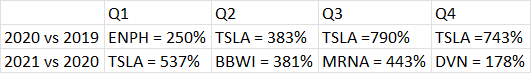

In [167]:
df.to_excel("output.xlsx")